# Linear Regression Using Python's NBA API (Beginner Project)

## Introduction

The use of statistics has fundamentally changed the NBA over the last decade. Teams are using dozens of advanced metrics to gauge how well their players are performing as well as how college prospects will perform in the future. Statistics have also contributed towards a shift in coaching philosophy. For example, the midrange jumper has disappeared in favor of the three-point shot which scores more points per attempt. It can be really fun to explore some of these Basketball statistics but challenging for a beginner Python programmer to approach.

For this project, we will use NBA season statistics to build a basic linear regression model. Our x-variable will be the number of field goal attempts (FGA) taken and the y-variable will be the average number of points per game (PPG) scored by each player. Instead of having a row for each game player, we will take season averages. This way, each row represents a single player's season average. We'll keep things simple in this project by focusing on how to make an API call with nba_api and how to use ScitKit-Learn to create a linear regression. Our end product will be a visualization and model that will help us understand the relationship between attempting a shot and scoring a point. Luckily for us, this is a fairly linear relationship. In the future, we can expand upon the model by including more variables, optimizing the model's parameters, or choosing a more interesting y-variable. 


#### Prerequisites:
*This is a beginner project that is easy enough for any new Python user*
<br>
* You must be comfortable downloading some packages

    
#### Packages:
* Pandas
* Numpy
* Sklearn
* requests
* nba_api ([found here](https://pypi.org/project/nba-api/)) 
* matplotlib

## Loading Data using nba_api

We'll use the nba_api library to get data for the current NBA season. Here's a [link to the package's website](https://pypi.org/project/nba-api/) so you can read more of the details. This library is helpful for anyone working on Basketball-based projects. It simplifies the process of getting data from the NBA.com/stats website by handling the heavy lifting behind the scenes. You should be able to find any Basketball stat you need from the [large number of datasets collected by the NBA](https://github.com/swar/nba_api/tree/master/docs/nba_api/stats/endpoints). We will use it to get data about season-scoring from the current year.

<br>

The first step is to import all of our packages. 


In [46]:
# First we will import our packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

With all our packages ready, we have to make a request for nba_api to download our dataset. We want information about season totals, so we use the LeagueLeaders() function. If you would like to make a request for another dataset, simply explore the [endpoints folder](https://github.com/swar/nba_api/tree/master/nba_api/stats/endpoints) until you find the data you need. Then, you can make a request using the same structure as below (replace leagueleaders with the appropriate name).

In [47]:
# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()   
                                 

Once our data is imported, it's helpful to use Panda's .head() function to read the first 5 rows of the dataset.

In [48]:
# take a sneak peak at the first 5 rows
df.head()     

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201935,1,James Harden,HOU,29,1090,324,722,0.449,149,...,168,218,54,21,142,99,1124,1000,1.54,0.38
1,203507,2,Giannis Antetokounmpo,MIL,29,902,336,591,0.569,51,...,368,160,37,34,106,91,911,1023,1.51,0.35
2,1629027,3,Trae Young,ATL,29,1031,276,622,0.444,99,...,127,244,34,2,137,44,841,732,1.78,0.25
3,203078,4,Bradley Beal,WAS,28,1039,267,601,0.444,75,...,139,195,30,8,97,72,790,696,2.01,0.31
4,203081,5,Damian Lillard,POR,28,1027,237,529,0.448,94,...,118,211,27,12,83,53,754,725,2.54,0.33


## Next Step : Build a Simple Regression Model

With a couple lines of code, we now have the season totals for all 466 players in the NBA. Now we can use sklearn to build a simple linear regression model. There's a lot of great information in our data, but we only need 2 variables: Field Goal Attempts (FGA) and total points. So, we will isolate that data and build from there.

In [49]:
# First we need to get per game stats.
# We divide each variable by games played (GP) to get per game average
x, y = df.FGA/df.GP, df.PTS/df.GP 

x = np.array(x).reshape(-1,1)     # we have to reshape our array from 1d to 2d. 
y = np.array(y).reshape(-1,1)     # The proper shaped array is an input requirement for the linear model
                                  # reshaping is usually an issue when using 1 x variable

In [50]:
model = linear_model.LinearRegression()    # create an object that contains the linear model class
model.fit(x,y)                             # Fit our modeling using FGA (x) and PPG (y)

r2 = round(model.score(x,y), 2)            # Get our r2 value and round it to 2 decimals. How much variance is exaplained?
predicted_y = model.predict(x)             # Get our predicted y values for x

### A Functional Model
We have created, trained, and made predictions using our model. If we wanted a more robust model, we would have taken a couple more steps -- both during data selection and model creation. For one, we would typically try to visualize our data, clean it, and do some feature engineering before we train our model. Feature engineering is a fancy word for creating new variables with the data we already have. That way, we know we are using a quality selection of x-variables to predict our y-variable. 

Second, we would normally want to test the accuracy of our model on a test set of data that was not used to train our model. We do this to make sure that our model is not overfit. An overfit model would be good at making predictions on the training data but not as accurate with new data. This is less than useful since we don't need predictions for data we already have. Using a test dataset to validate our model is called cross-validation. Typically, to do this, we split our original data into two different dataframes. The first, our training data, would contain a random sample of 85% of the original data. The test set would contain the remaining 15%. We train with the training data and then test with the test data. Simple enough.


## Visualize our Results
It's always good practice to visualize your model so that you can see how it's performing. Linear regression can be easily visualized using a scatter plot for the actual y-values and a line for the predicted y-values. We'll use Matplotlib -- the most popular visualization package -- but there are a handful of alternatives. For readability, we'll create our graph line-by-line. Each line of code will add a new feature to our graph like our scatter points or our labels. 

You might have to change the location of the text depending on the scoring numbers of players during the season that you are doing this project.


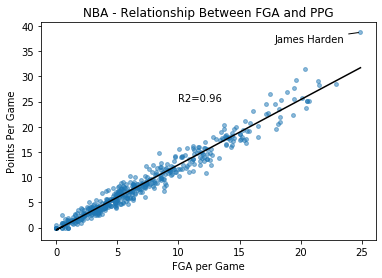

In [51]:
# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=15, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(10,25, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly


""" It looks like one player is far from the pack on offense. We should annotate that point! 
    We know that the first x-value in our dataset ( the first row ) is the highest scoring player
    because of the .head() that we used earlier. So we can use x[0] and y[0] since this refers to the first row
"""
                                              
plt.annotate(df.PLAYER[0],                       # This the name of the top scoring player. Refer to the .head() from earlier
             (x[0], y[0]),                       # This is the point we want to annotate.  
             (x[0]-7,y[0]-2),                    # These are coords for the text
             arrowprops=dict(arrowstyle='-'))    # Here we use a flat line for the arrow '-'


# Finally, let's save an image called 'graph.png'. We'll set the dpi (dots per inch) to 300, so we have a nice looking picture.
plt.savefig('graph.png', dpi=300) 


#### Conclusion

Unsurprisingly, if a basketball player takes more shots during a game, they tend to score more points. This is an obvious idea, but our graph shows us several other interesting patterns:

* We can visually see that most players in the league take ~7 or fewer shots per game. 
* Players who take a high volume of shots per game (17+) start to perform better than what the model predicts.

We can think of it this way: Players who are really good at scoring are allowed to take more shots. These players are more efficient than the average; therefore, our linear model is not as good at predicting their points scored.


### Congratulations! 
Using what you learned from this model, you should be able to start exploring the interesting datasets on NBA.com. A good first step is to expand this model. Try including more x-variables into your model and see how that changes the predictions or the line of fit.